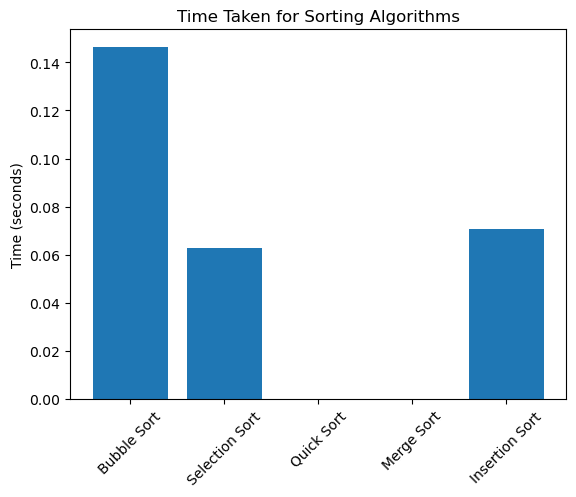

In [25]:
#Q1
import random
import time
import matplotlib.pyplot as plt

# Bubble sort algorithm
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Selection sort algorithm
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

# Quick sort algorithm
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Merge sort algorithm
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] < right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
    result.extend(left[left_idx:])
    result.extend(right[right_idx:])
    return result

# Insertion sort algorithm
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Function to measure time taken for sorting
def sort_time(func, arr):
    start_time = time.time()
    sorted_arr = arr.copy()
    func(sorted_arr)
    end_time = time.time()
    return end_time - start_time

# Generate 1000 random integers
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

times = {}

times['Bubble Sort'] = sort_time(bubble_sort, random_numbers)
times['Selection Sort'] = sort_time(selection_sort, random_numbers)
times['Quick Sort'] = sort_time(quick_sort, random_numbers)
times['Merge Sort'] = sort_time(merge_sort, random_numbers)
times['Insertion Sort'] = sort_time(insertion_sort, random_numbers)

plt.bar(range(len(times)), list(times.values()), align='center')
plt.xticks(range(len(times)), list(times.keys()), rotation=45)
plt.ylabel('Time (seconds)')
plt.title('Time Taken for Sorting Algorithms')
plt.show()


In [1]:
#Q2
import heapq

def sorted_arrays(arrays):
    min_heap = []
    result = []

    for i, arr in enumerate(arrays):
        if arr:  
            heapq.heappush(min_heap, (arr[0], i, 0))  

    while min_heap:
        val, arr_idx, idx_in_arr = heapq.heappop(min_heap)
        result.append(val)
        if idx_in_arr + 1 < len(arrays[arr_idx]):
            next_val = arrays[arr_idx][idx_in_arr + 1]
            heapq.heappush(min_heap, (next_val, arr_idx, idx_in_arr + 1))
    return result

arrays = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 39],
    [32, 33]
]

sorted_result = sorted_arrays(arrays)
print(sorted_result)

[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 39]


In [36]:
#Q3
import random

def selection_sort(arr, k):
    n = len(arr)
    for i in range(0, k): 
        maximum = i 
        for j in range(i + 1, n):
            if arr[j] > arr[maximum]:
                maximum = j
        arr[i], arr[maximum] = arr[maximum], arr[i]
    return arr[:k]  

arr = [random.randint(0, 100) for _ in range(100)]
k = 5
largest_elements = selection_sort(arr, k)
print("K largest elements:", largest_elements)

K largest elements: [99, 99, 98, 97, 97]


In [39]:
#Q4
def max_activities(activities):
    sorted_activities = sorted(activities, key=lambda x: x[1])

    max_count = 0
    final_time = 0
    selected_activities = []

    for activity in sorted_activities:
        start_time, finish_time = activity
        if start_time >= final_time:
            max_count += 1
            final_time = finish_time
            selected_activities.append(activity)
    
    return max_count, selected_activities

activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]
max_count, selected_activities = max_activities(activities)
print("Maximum number of activities performed by a single person:", max_count)
print("Activities being performed:")
for activity in selected_activities:
    print(f"({activity[0]},{activity[1]})")


Maximum number of activities performed by a single person: 4
Activities being performed:
(1,4)
(5,7)
(8,11)
(12,14)


In [44]:
#Q5
def merge_intervals(intervals):
    
    sorted_intervals = sorted(intervals, key=lambda x: x[0])
    merged_intervals = [sorted_intervals[0]]

    # Iterate through sorted intervals
    for interval in sorted_intervals[1:]:
        current_start, current_end = interval
        last_start, last_end = merged_intervals[-1]
        if current_start <= last_end:
            merged_intervals[-1] = (last_start, max(last_end, current_end))
        else:
            merged_intervals.append(interval)

    return merged_intervals

intervals = [(1, 4), (2, 5), (7, 8), (6,9)]
merged_intervals = merge_intervals(intervals)
print("Intervals after merging:")
for interval in merged_intervals:
    print(f"({interval[0]},{interval[1]})")


Intervals after merging:
(1,5)
(6,9)
